In [37]:
#Importing LIbraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pylab as py

from sklearn.impute import SimpleImputer

from sklearn.feature_selection import mutual_info_regression
import xgboost as xgb
import lightgbm as lgb

from sklearn.preprocessing import RobustScaler, PowerTransformer 

from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import  OneHotEncoder

from sklearn.model_selection import KFold, cross_val_score , train_test_split

from sklearn.ensemble import RandomForestClassifier,StackingClassifier
 
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Oversample imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
 
from imblearn.over_sampling import BorderlineSMOTE, SMOTE,ADASYN

from matplotlib import pyplot
from numpy import where

import pickle

import warnings
warnings.filterwarnings('ignore')

In [38]:
df = pd.read_csv("loan_port.csv", parse_dates=[3])
df['loan_status'] = df['loan_status'].replace({0: 'Not Default', 1: 'Default'})
df
# Create a new column for the loan type





,loan_id,loan_type,interest_rate,loan_amount,remaining_principal,accrued_interest,remaining_interest,total_outstanding,past_due_penalty,expired_penalty,disbursement_date,repayment_start_date,repayment_frequency,repayment_end_date,number_of_repayments,loan_status,Unnamed: 16
0,4900002277,BUSINESS,0.96,10000,3333.32,4800.0,1600.00,4933.32,41.77,0.00,03/11/2022,20/11/2022,Monthly,23/04/2023,6,Default,NaN
1,4900002454,BUSINESS,0.60,1500,1406.25,300.0,281.25,1687.50,0.00,0.00,15/03/2023,16/03/2023,Weekly,29/06/2023,16,Default,NaN
2,4900001673,BUSINESS,0.96,2000,2000.00,960.0,960.00,2960.00,0.00,0.00,12/03/2023,23/03/2023,Monthly,27/08/2023,6,Default,NaN
3,4900002353,BUSINESS,0.96,9000,9000.00,4320.0,4320.00,13320.00,415.30,0.00,30/11/2022,25/12/2022,Monthly,28/05/2023,6,Default,NaN
4,4900002262,BUSINESS,0.72,4000,2000.00,960.0,480.00,2480.00,0.00,0.00,26/01/2023,02/02/2023,Bi-Weekly,11/05/2023,8,Default,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599,4900000099,BUSINESS,0.96,5000,211.72,1200.0,0.00,211.72,0.00,13670.60,08/08/2019,05/09/2019,Monthly,NaN,3,Not Default,NaN
1600,4900000638,BUSINESS,0.60,2000,0.00,400.0,0.00,0.00,22.01,1.24,10/08/2020,17/08/2020,Weekly,NaN,16,Not Default,NaN
1601,4900001544,GROUP,0.60,1500,907.25,300.0,168.75,1076.00,47.78,781.78,28/09/2021,05/10/2021,Weekly,NaN,16,Not Default,NaN
1602,4900002052,BUSINESS,0.84,20000,3333.35,8400.0,1130.65,4464.00,239.17,587.54,07/07/2022,07/08/2022,Monthly,NaN,6,Not Default,NaN


In [39]:
df.columns

Index([' loan_id', ' loan_type', ' interest_rate ', 'loan_amount',
       'remaining_principal', 'accrued_interest', 'remaining_interest',
       'total_outstanding', 'past_due_penalty', 'expired_penalty',
       ' disbursement_date', 'repayment_start_date', 'repayment_frequency',
       'repayment_end_date', ' number_of_repayments', 'loan_status',
       'Unnamed: 16'],
      dtype='object')

In [40]:
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0    loan_id               1604 non-null   int64  
 1    loan_type             1604 non-null   object 
 2    interest_rate         1604 non-null   float64
 3   loan_amount            1604 non-null   float64
 4   remaining_principal    1604 non-null   float64
 5   accrued_interest       1604 non-null   float64
 6   remaining_interest     1604 non-null   float64
 7   total_outstanding      1604 non-null   float64
 8   past_due_penalty       1604 non-null   float64
 9   expired_penalty        1604 non-null   float64
 10   disbursement_date     1604 non-null   object 
 11  repayment_start_date   1604 non-null   object 
 12  repayment_frequency    1604 non-null   object 
 13  repayment_end_date     178 non-null    object 
 14   number_of_repayments  1604 non-null   int64  
 15  loan

In [41]:
#Checking the number of missing values in each column
df.isnull().sum()

 loan_id                    0
 loan_type                  0
 interest_rate              0
loan_amount                 0
remaining_principal         0
accrued_interest            0
remaining_interest          0
total_outstanding           0
past_due_penalty            0
expired_penalty             0
 disbursement_date          0
repayment_start_date        0
repayment_frequency         0
repayment_end_date       1426
 number_of_repayments       0
loan_status                 0
Unnamed: 16              1603
dtype: int64

In [42]:
# Remove leading/trailing spaces from all columns in the DataFrame
df.columns = df.columns.str.strip()
df.drop(['loan_id', 'disbursement_date', 'repayment_start_date', 'repayment_end_date','Unnamed: 16'], axis=1, inplace=True)



Text(0.5, 1.0, 'Missing Iquitos Data')

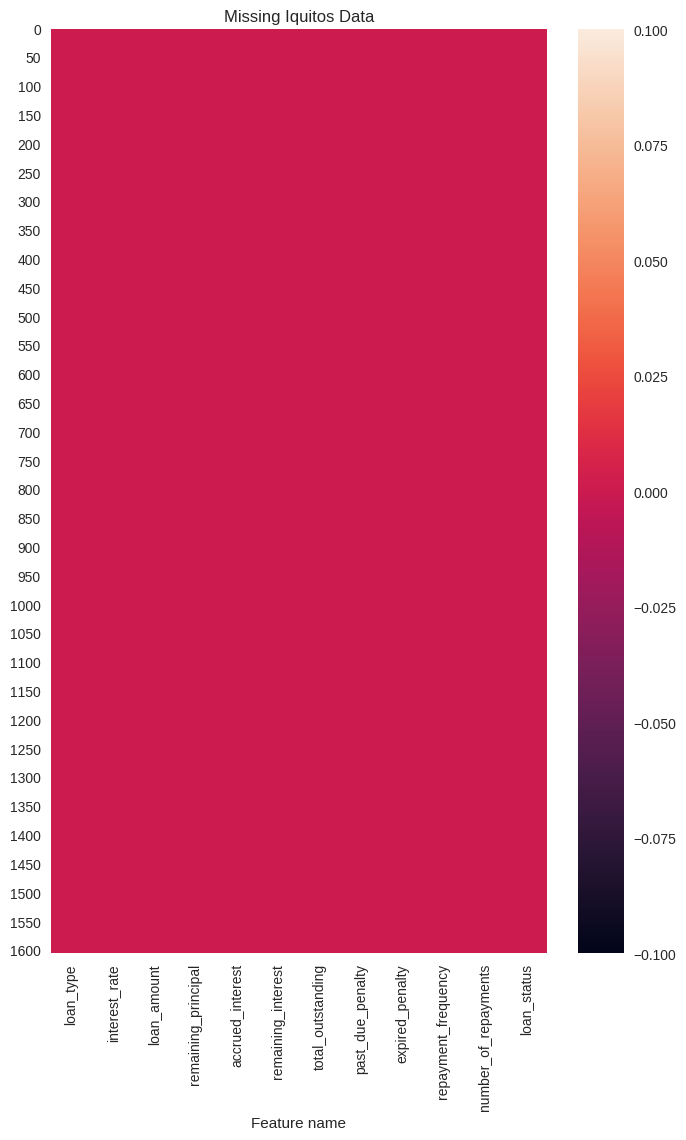

In [43]:
g, ax = plt.subplots(figsize=(8,12))
sns.heatmap(df.isnull().reset_index(drop=True), yticklabels = 50)
plt.xlabel("Feature name")
plt.title("Missing Iquitos Data")

In [44]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Scatter plot of loan amount vs remaining interest
# sns.scatterplot(x='loan_amount', y='remaining_interest', data=df, hue='loan_status')
# plt.title('Loan Amount vs Remaining Interest')
# plt.show()

# # Box plot of loan type vs interest rate
# sns.boxplot(x='loan_type', y='interest_rate', data=df, hue='loan_status')
# plt.title('Loan Type vs Interest Rate')
# plt.show()

# # Scatter plot of past due penalty vs expired penalty
# sns.scatterplot(x='past_due_penalty', y='expired_penalty', data=df, hue='loan_status')
# plt.title('Past Due Penalty vs Expired Penalty')
# plt.show()

# # Count plot of repayment frequency
# sns.countplot(x='repayment_frequency', data=df, hue='loan_status')
# plt.title('Repayment Frequency')
# plt.show()


In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set theme and style for plots
# sns.set_theme(style="ticks")
# sns.set_context("talk")

# # Define custom palette and legend labels
# custom_palette = {"Not Default": "green", "Default": "red"}
# legend_labels = ["Not Default", "Default"]

# # Set up the subplots with larger spacing
# fig, axs = plt.subplots(2, 2, figsize=(12, 10), gridspec_kw={'wspace': 0.4, 'hspace': 0.4})

# # Scatter plot of loan amount vs interest rate
# sns.scatterplot(x='loan_amount', y='interest_rate', data=df, hue='loan_status', palette=custom_palette, ax=axs[0, 0])
# axs[0, 0].set_title('Loan Amount vs Interest Rate')
# axs[0, 0].set_xlabel('Loan Amount')
# axs[0, 0].set_ylabel('Interest Rate')
# axs[0, 0].legend(title="Loan Status", labels=legend_labels)

# # Scatter plot of total outstanding vs remaining principal
# sns.scatterplot(x='total_outstanding', y='remaining_principal', data=df, hue='loan_status', palette=custom_palette, ax=axs[0, 1])
# axs[0, 1].set_title('Total Outstanding vs Remaining Principal')
# axs[0, 1].set_xlabel('Total Outstanding')
# axs[0, 1].set_ylabel('Remaining Principal')
# axs[0, 1].legend(title="Loan Status", labels=legend_labels)

# # Histogram of loan amount
# sns.histplot(x='loan_amount', data=df, hue='loan_status', kde=True, alpha=0.5, bins=20, multiple="dodge", palette=custom_palette, ax=axs[1, 0])
# axs[1, 0].set_title('Loan Amount Distribution')
# axs[1, 0].set_xlabel('Loan Amount')
# axs[1, 0].set_ylabel('Frequency')
# axs[1, 0].legend(title="Loan Status", labels=legend_labels)

# # Histogram of interest rate
# sns.histplot(x='interest_rate', data=df, hue='loan_status', kde=True, alpha=0.5, bins=20, multiple="dodge", palette=custom_palette, ax=axs[1, 1])
# axs[1, 1].set_title('Interest Rate Distribution')
# axs[1, 1].set_xlabel('Interest Rate')
# axs[1, 1].set_ylabel('Frequency')
# axs[1, 1].legend(title="Loan Status", labels=legend_labels)

# plt.show()


In [46]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set up the subplots with larger spacing
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# plt.subplots_adjust(hspace=0.4)

# # Set a custom color palette
# custom_palette = {"Not Default": "green", "Default": "red"}

# # Scatter plot of loan amount vs remaining interest
# sns.scatterplot(x='loan_amount', y='remaining_interest', data=df, hue='loan_status', ax=axs[0, 0], palette=custom_palette)
# axs[0, 0].set_title('Loan Amount vs Remaining Interest')
# axs[0, 0].set_xlabel('Loan Amount')
# axs[0, 0].set_ylabel('Remaining Interest')

# # Box plot of loan type vs interest rate
# sns.boxplot(x='loan_type', y='interest_rate', data=df, hue='loan_status', ax=axs[0, 1], palette=custom_palette,showmeans=True)
# axs[0, 1].set_title('Loan Type vs Interest Rate')
# axs[0, 1].set_xlabel('Loan Type')
# axs[0, 1].set_ylabel('Interest Rate')

# # Scatter plot of past due penalty vs expired penalty
# sns.scatterplot(x='past_due_penalty', y='expired_penalty', data=df, hue='loan_status', ax=axs[1, 0], palette=custom_palette)
# axs[1, 0].set_title('Past Due Penalty vs Expired Penalty')
# axs[1, 0].set_xlabel('Past Due Penalty')
# axs[1, 0].set_ylabel('Expired Penalty')

# # Count plot of repayment frequency
# sns.countplot(x='repayment_frequency', data=df, hue='loan_status', ax=axs[1, 1], palette=custom_palette)
# axs[1, 1].set_title('Repayment Frequency')
# axs[1, 1].set_xlabel('Repayment Frequency')
# axs[1, 1].set_ylabel('Count')
# axs[1, 1].tick_params(axis='x', labelrotation=45)

# # Modify the legend to be smaller
# handles, labels = axs[0, 1].get_legend_handles_labels()
# axs[0, 1].legend(handles, labels, loc='upper right', prop={'size': 8})

# # Show the plot
# plt.show()





In [47]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Create a new column for the loan type
# df['loan_type'] = df['loan_type'].replace('BUSINESS_PERSONAL', 'business')

# # Set up the subplots with larger spacing
# fig, axs = plt.subplots(2, 2, figsize=(12, 10))
# plt.subplots_adjust(hspace=0.4)

# # Set a custom color palette
# custom_palette = {"Not Default": "green", "Default": "red"}

# # Scatter plot of loan amount vs remaining interest
# sns.scatterplot(x='loan_amount', y='remaining_interest', data=df, hue='loan_status', ax=axs[0, 0], palette=custom_palette)
# axs[0, 0].set_title('Loan Amount vs Remaining Interest')
# axs[0, 0].set_xlabel('Loan Amount')
# axs[0, 0].set_ylabel('Remaining Interest')

# # Box plot of loan type vs interest rate
# sns.boxplot(x='loan_type', y='interest_rate', data=df, hue='loan_status', ax=axs[0, 1], palette=custom_palette)
# axs[0, 1].set_title('Loan Type vs Interest Rate')
# axs[0, 1].set_xlabel('Loan Type')
# axs[0, 1].set_ylabel('Interest Rate')
# axs[0, 1].axhline(df['interest_rate'].mean(), color='blue', linestyle='--')

# # Scatter plot of past due penalty vs expired penalty
# sns.scatterplot(x='past_due_penalty', y='expired_penalty', data=df, hue='loan_status', ax=axs[1, 0], palette=custom_palette)
# axs[1, 0].set_title('Past Due Penalty vs Expired Penalty')
# axs[1, 0].set_xlabel('Past Due Penalty')
# axs[1, 0].set_ylabel('Expired Penalty')

# # Count plot of repayment frequency
# sns.countplot(x='repayment_frequency', data=df, hue='loan_status', ax=axs[1, 1], palette=custom_palette)
# axs[1, 1].set_title('Repayment Frequency')
# axs[1, 1].set_xlabel('Repayment Frequency')
# axs[1, 1].set_ylabel('Count')
# axs[1, 1].tick_params(axis='x', labelrotation=45)

# # Show the plot
# plt.show()


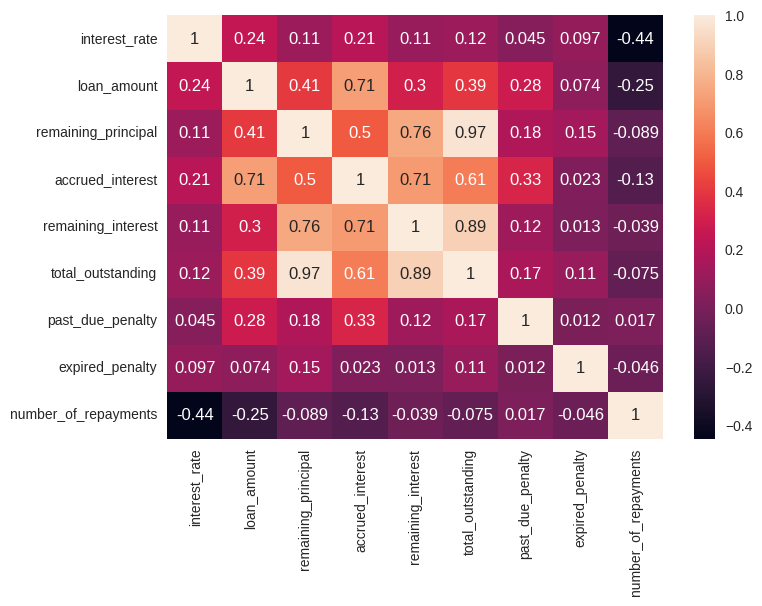

In [48]:
sns.heatmap(df.corr(), annot=True)
plt.show()

Text(0.5, 1.0, 'Cleaned Iquitos Data')

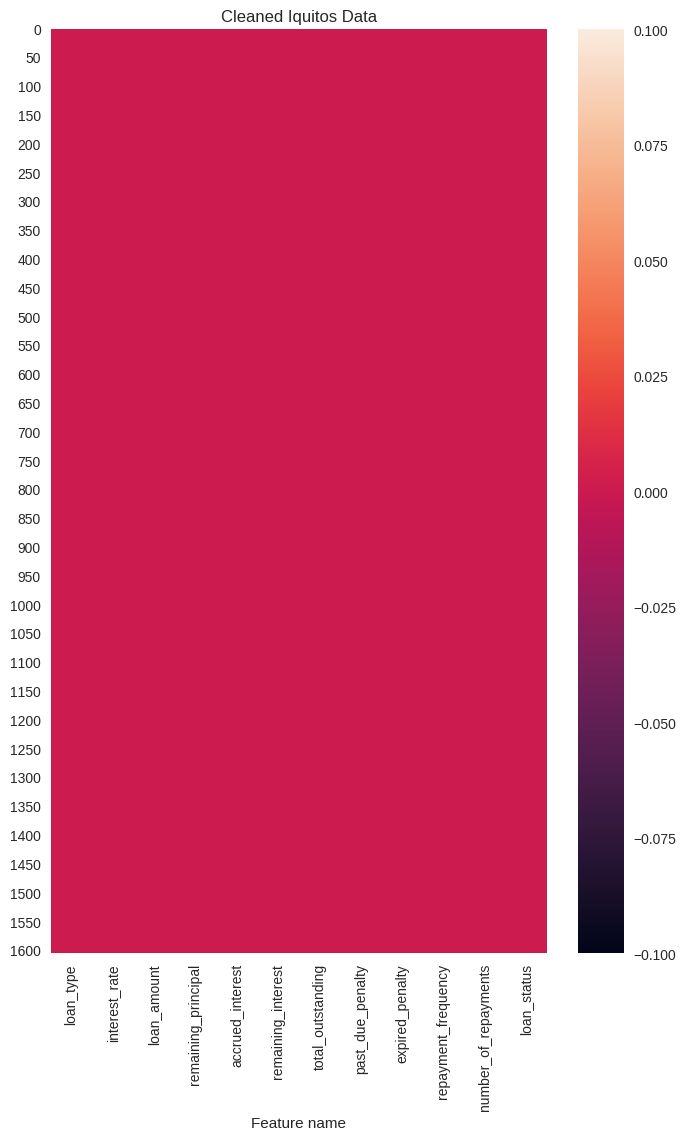

In [49]:
#visual graph of a clean dataset
fig, ax = plt.subplots(figsize=(8,12))
sns.heatmap(df.isnull().reset_index(drop=True), yticklabels = 50)
plt.xlabel("Feature name")
plt.title("Cleaned Iquitos Data")

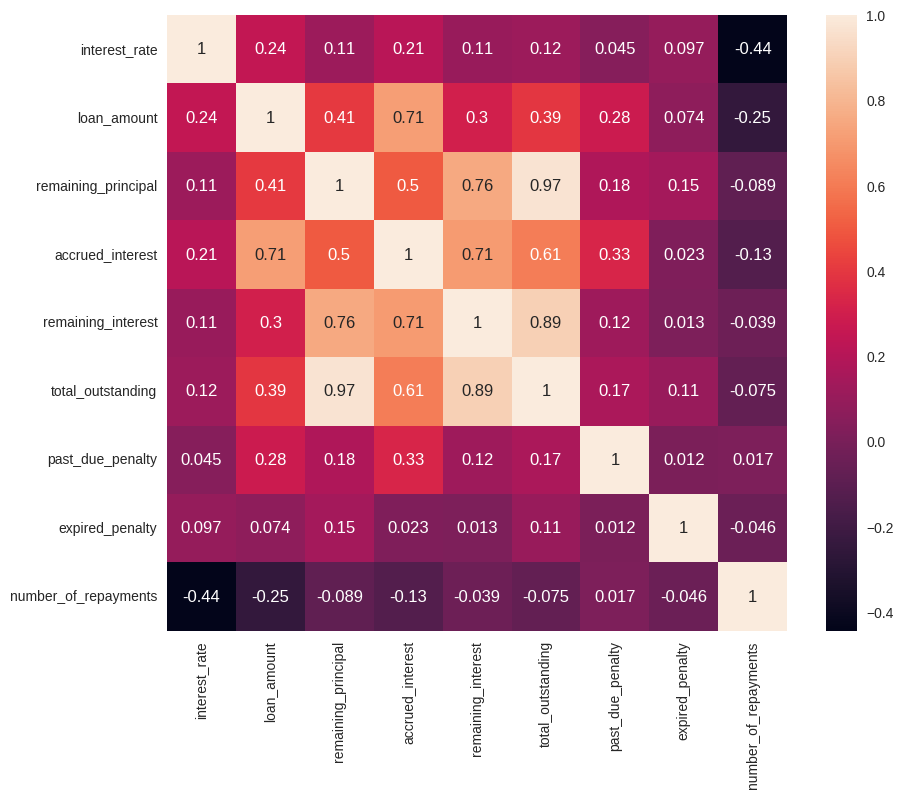

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# set figure size
fig, ax = plt.subplots(figsize=(10,8))

# create heatmap with larger font size for annotations
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12})

# show plot
plt.show()


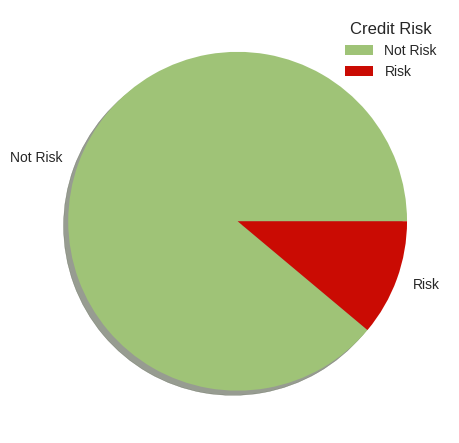

In [51]:
#visualising the "label" column 
plt.pie(df["loan_status"].value_counts(),labels = ["Not Risk","Risk"],colors = ["g","r"],shadow = True)
plt.legend(title ="Credit Risk")
plt.show() 
#This shows that the dataset is Imbalanced

Not Default    1426
Default         178
Name: loan_status, dtype: int64


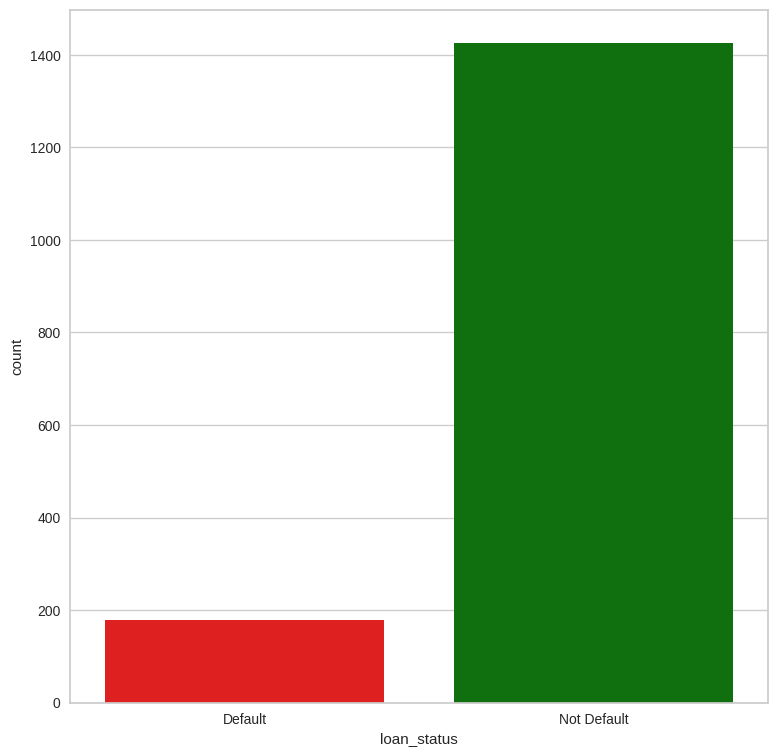

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(9, 9))

# Set the color palette
colors = ["red", "green"]
sns.set_palette(sns.color_palette(colors))

# Plot the countplot
sns.countplot(x=df["loan_status"])

# Display the value counts
print(df["loan_status"].value_counts())



In [53]:
# #preprocessing
x = df.drop("loan_status", axis=1)
y = df.loan_status



In [54]:
# encoding risk as binary
r = {"Not Default":0, "Default": 1}
df['loan_status'] = df['loan_status'].map(r)
df

,loan_type,interest_rate,loan_amount,remaining_principal,accrued_interest,remaining_interest,total_outstanding,past_due_penalty,expired_penalty,repayment_frequency,number_of_repayments,loan_status
0,BUSINESS,0.96,10000.0,3333.32,4800.0,1600.00,4933.32,41.77,0.00,Monthly,6,1
1,BUSINESS,0.60,1500.0,1406.25,300.0,281.25,1687.50,0.00,0.00,Weekly,16,1
2,BUSINESS,0.96,2000.0,2000.00,960.0,960.00,2960.00,0.00,0.00,Monthly,6,1
3,BUSINESS,0.96,9000.0,9000.00,4320.0,4320.00,13320.00,415.30,0.00,Monthly,6,1
4,BUSINESS,0.72,4000.0,2000.00,960.0,480.00,2480.00,0.00,0.00,Bi-Weekly,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1599,BUSINESS,0.96,5000.0,211.72,1200.0,0.00,211.72,0.00,13670.60,Monthly,3,0
1600,BUSINESS,0.60,2000.0,0.00,400.0,0.00,0.00,22.01,1.24,Weekly,16,0
1601,GROUP,0.60,1500.0,907.25,300.0,168.75,1076.00,47.78,781.78,Weekly,16,0
1602,BUSINESS,0.84,20000.0,3333.35,8400.0,1130.65,4464.00,239.17,587.54,Monthly,6,0


In [55]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA



# Create a list of column names to use as independent variables in the regression model
independent_vars = ['interest_rate', 'loan_amount', 'remaining_principal',
                    'past_due_penalty', 'expired_penalty', 'number_of_repayments']

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Features'] = independent_vars
vif['VIF'] = [variance_inflation_factor(df[independent_vars].values, i) for i in range(len(independent_vars))]

# Print the VIF values for each independent variable
print(vif)

# Create a correlation matrix
corr_matrix = df.corr()

# Drop the columns that have a correlation greater than 0.7 with another variable
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

df = df.drop(high_corr_vars, axis=1)

# Run PCA on the remaining independent variables to select features
X = df[independent_vars]
pca = PCA()
X_pca = pca.fit_transform(X)

# Get the explained variance ratios for each component
explained_variances = pca.explained_variance_ratio_

# Select the top 3 components that explain the most variance
selected_components = pca.components_[:5]

# Get the names of the top 3 components
selected_features = []
for component in selected_components:
    index = component.argmax()
    selected_features.append(X.columns[index])

# Print the selected features
print(f"Selected features: {selected_features}")




               Features       VIF
0         interest_rate  2.869066
1           loan_amount  2.715611
2   remaining_principal  1.377006
3      past_due_penalty  1.193371
4       expired_penalty  1.029998
5  number_of_repayments  1.535846
Selected features: ['expired_penalty', 'loan_amount', 'remaining_principal', 'past_due_penalty', 'number_of_repayments']


In [56]:
#Splitting Dataset
X_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [57]:
X_train.isnull().sum()
x_test.isnull().sum()

loan_type               0
interest_rate           0
loan_amount             0
remaining_principal     0
accrued_interest        0
remaining_interest      0
total_outstanding       0
past_due_penalty        0
expired_penalty         0
repayment_frequency     0
number_of_repayments    0
dtype: int64

In [58]:
unique_values = df['loan_type'].str.strip().unique()
print(unique_values)

['BUSINESS' 'GROUP']


In [59]:
# Get categorical features
cat_cols = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_cat = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine one-hot encoded features with original dataframe
df= pd.concat([df, df_cat], axis=1)


# # Drop original categorical features
df.drop(cat_cols, axis=1, inplace=True)

df=df.apply(pd.to_numeric)
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1604 entries, 0 to 1603
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   interest_rate                    1604 non-null   float64
 1   loan_amount                      1604 non-null   float64
 2   remaining_principal              1604 non-null   float64
 3   past_due_penalty                 1604 non-null   float64
 4   expired_penalty                  1604 non-null   float64
 5   number_of_repayments             1604 non-null   int64  
 6   loan_status                      1604 non-null   int64  
 7   loan_type_   GROUP               1604 non-null   uint8  
 8   repayment_frequency_ Daily       1604 non-null   uint8  
 9   repayment_frequency_ Monthly     1604 non-null   uint8  
 10  repayment_frequency_ Quarterly   1604 non-null   uint8  
 11  repayment_frequency_ Weekly      1604 non-null   uint8  
dtypes: float64(5), int64

In [60]:
# #preprocessing
x = df.drop("loan_status", axis=1)
y = df.loan_status


In [61]:
for col in x.select_dtypes(include=['object']):
    print(col)
    print(x[col].unique())


In [62]:
#Balancing the dataset
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(sampling_strategy=0.7)
X_train, y_train = os.fit_resample(x, y)
print(" New 'x' has",X_train.shape,"        New 'Y' has",y_train.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

x_test, y_test = os.fit_resample(x, y)
print(" New 'x' has",x_test.shape,"        New 'Y' has",y_test.shape)
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_test)))

 New 'x' has (2424, 11)         New 'Y' has (2424,)
Original dataset shape Counter({0: 1426, 1: 178})
Resampled dataset shape Counter({0: 1426, 1: 998})
 New 'x' has (2424, 11)         New 'Y' has (2424,)
Original dataset shape Counter({0: 1426, 1: 178})
Resampled dataset shape Counter({0: 1426, 1: 998})


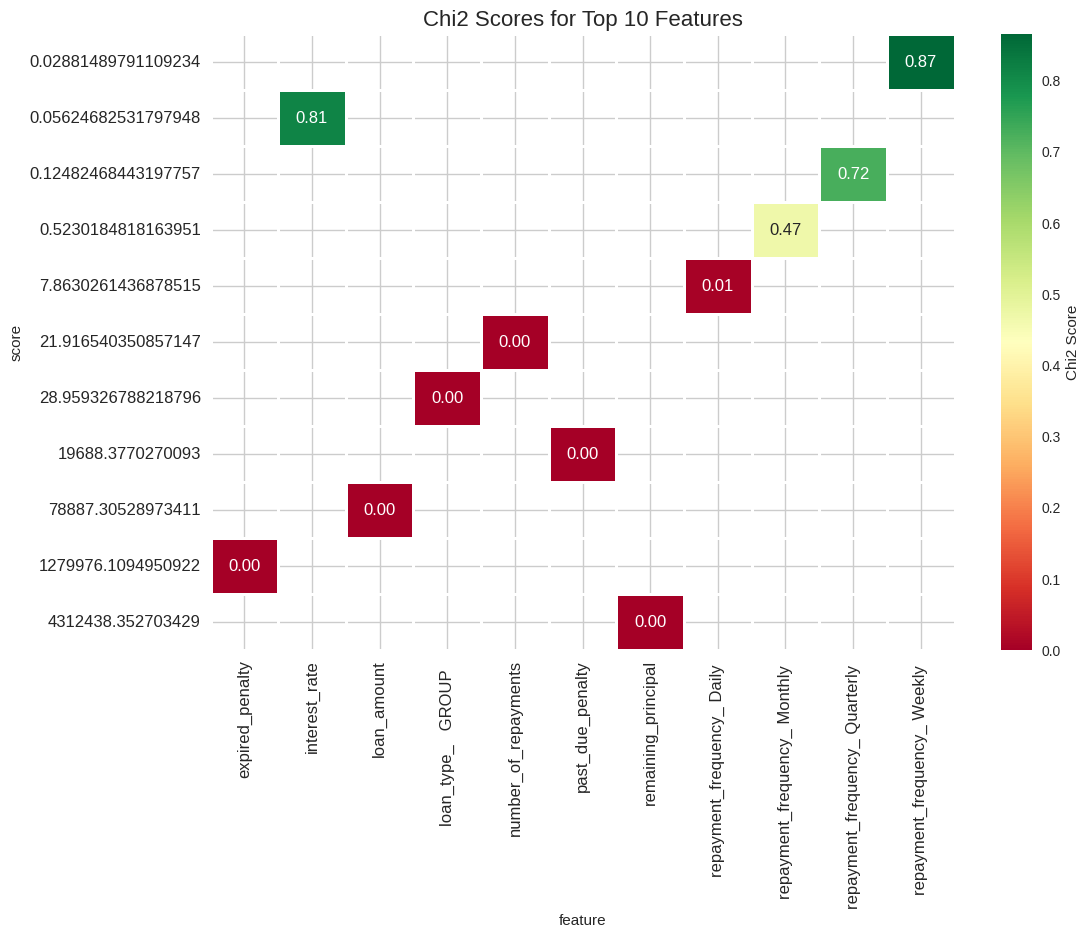

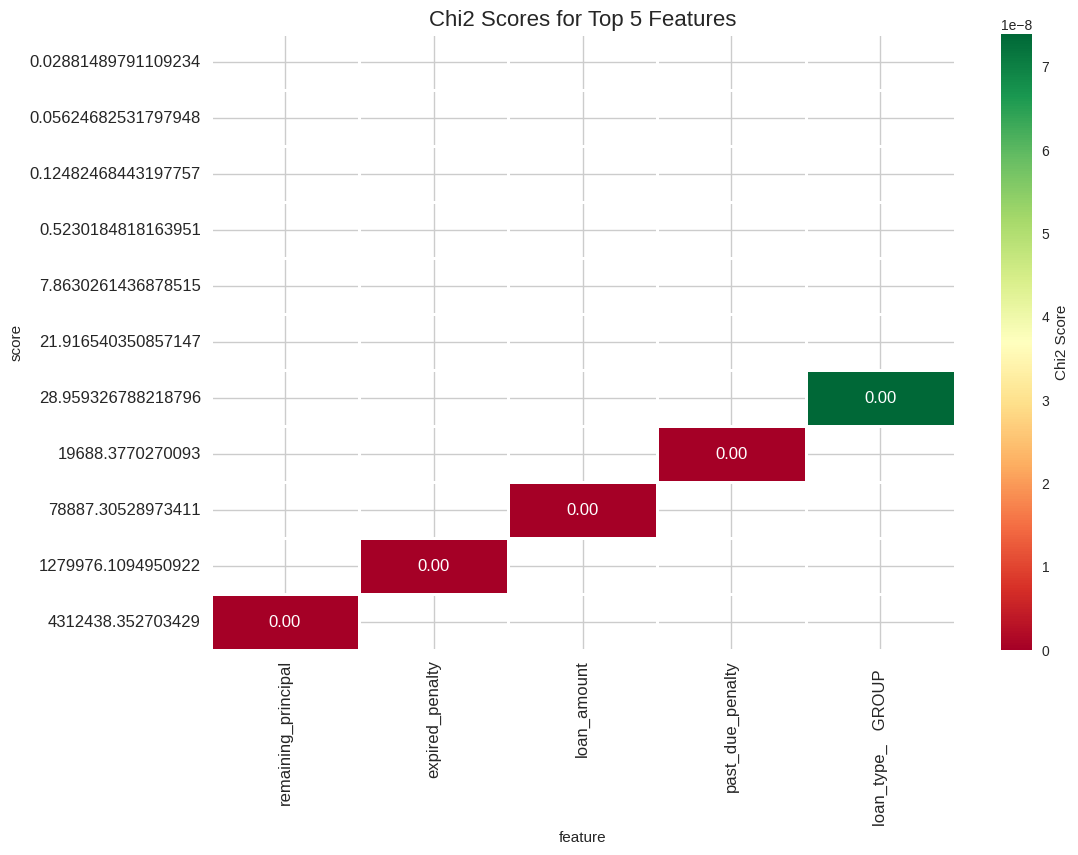

Feature selection correlation:
1. remaining_principal (score: 4312438.35, p-value: 0.00)
2. expired_penalty (score: 1279976.11, p-value: 0.00)
3. loan_amount (score: 78887.31, p-value: 0.00)
4. past_due_penalty (score: 19688.38, p-value: 0.00)
5. loan_type_   GROUP   (score: 28.96, p-value: 0.00)
6. number_of_repayments (score: 21.92, p-value: 0.00)
7. repayment_frequency_ Daily  (score: 7.86, p-value: 0.01)
8. repayment_frequency_ Monthly  (score: 0.52, p-value: 0.47)
9. repayment_frequency_ Quarterly  (score: 0.12, p-value: 0.72)
10. interest_rate (score: 0.06, p-value: 0.81)


In [63]:
from sklearn.feature_selection import SelectKBest, chi2
# apply SelectKBest to select the top 10 features
best_features = SelectKBest(score_func=chi2, k=10).fit(x, y)

# get the scores and p-values for each feature
scores = best_features.scores_
p_values = best_features.pvalues_

# create a list of features and their corresponding scores and p-values
feature_scores = list(zip(x.columns, scores, p_values))

# sort the list in descending order by scores
feature_scores.sort(key=lambda x: x[1], reverse=True)

# create a dataframe of the feature scores
scores_df = pd.DataFrame(feature_scores, columns=['feature', 'score', 'p-value'])

# sort the dataframe by scores in descending order
scores_df = scores_df.sort_values(by='score', ascending=False)

# select only the top 10 features
top_10_features = scores_df.iloc[:10]['feature'].values

# create a heatmap of the feature scores for top 10 features
plt.figure(figsize=(12, 8))
sns.heatmap(scores_df.pivot(index='score', columns='feature', values='p-value'), 
            cmap='RdYlGn', annot=True, fmt='.2f', linewidths=1, linecolor='white', 
            cbar_kws={'label': 'Chi2 Score'})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.title('Chi2 Scores for Top 10 Features', fontsize=16)
plt.show()

# highlight only the top 5 features in the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(scores_df.pivot(index='score', columns='feature', values='p-value').loc[:, top_10_features[:5]], 
            cmap='RdYlGn', annot=True, fmt='.2f', linewidths=1, linecolor='white', 
            cbar_kws={'label': 'Chi2 Score'})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.title('Chi2 Scores for Top 5 Features', fontsize=16)
plt.show()

# print the feature scores
print("Feature selection correlation:")
for i in range(10):
    print(f"{i+1}. {feature_scores[i][0]} (score: {feature_scores[i][1]:.2f}, p-value: {feature_scores[i][2]:.2f})")



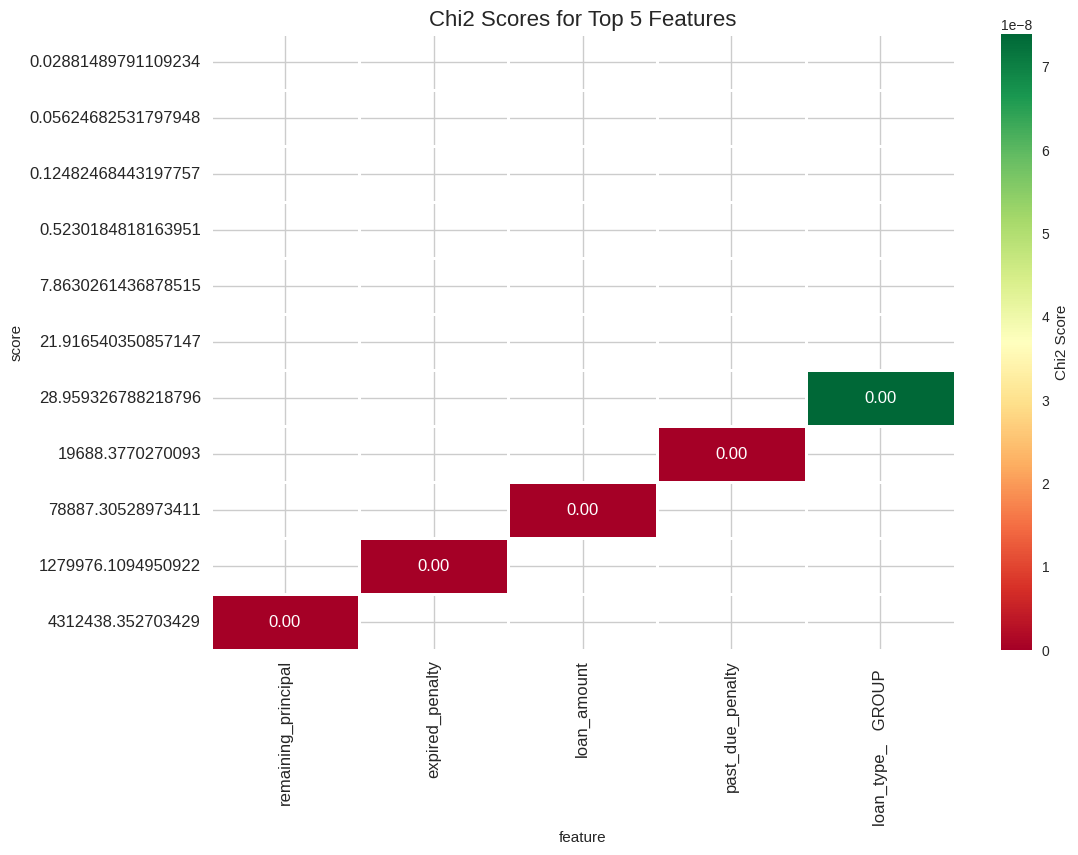

Feature selection correlation:
1. remaining_principal (score: 4312438.35, p-value: 0.00)
2. expired_penalty (score: 1279976.11, p-value: 0.00)
3. loan_amount (score: 78887.31, p-value: 0.00)
4. past_due_penalty (score: 19688.38, p-value: 0.00)
5. loan_type_   GROUP   (score: 28.96, p-value: 0.00)


In [64]:
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import seaborn as sns

# apply SelectKBest to select the top 5 features
best_features = SelectKBest(score_func=chi2, k=5).fit(x, y)

# get the scores and p-values for each feature
scores = best_features.scores_
p_values = best_features.pvalues_

# create a list of features and their corresponding scores and p-values
feature_scores = list(zip(x.columns, scores, p_values))

# sort the list in descending order by scores
feature_scores.sort(key=lambda x: x[1], reverse=True)

# create a dataframe of the feature scores
scores_df = pd.DataFrame(feature_scores, columns=['feature', 'score', 'p-value'])

# sort the dataframe by scores in descending order
scores_df = scores_df.sort_values(by='score', ascending=False)

# select only the top 5 features
top_5_features = scores_df.iloc[:5]['feature'].values

# create a heatmap of the feature scores for top 5 features
plt.figure(figsize=(12, 8))
sns.heatmap(scores_df.pivot(index='score', columns='feature', values='p-value').loc[:, top_5_features], 
            cmap='RdYlGn', annot=True, fmt='.2f', linewidths=1, linecolor='white', 
            cbar_kws={'label': 'Chi2 Score'})
plt.yticks(fontsize=12)
plt.xticks(fontsize=12, rotation=90)
plt.title('Chi2 Scores for Top 5 Features', fontsize=16)
plt.show()

# print the feature scores
print("Feature selection correlation:")
for i in range(5):
    print(f"{i+1}. {feature_scores[i][0]} (score: {feature_scores[i][1]:.2f}, p-value: {feature_scores[i][2]:.2f})")


In [65]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


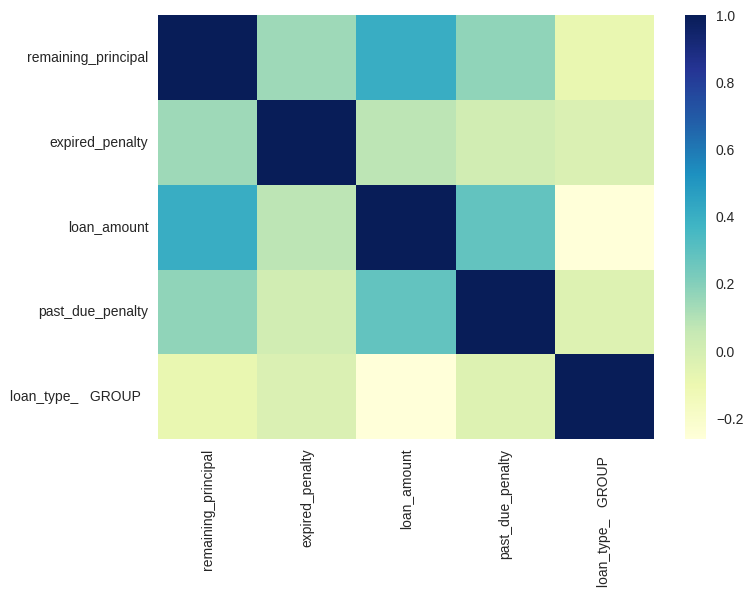

Top 10 features:
1. remaining_principal (score: 4312438.35, p-value: 0.00)
2. expired_penalty (score: 1279976.11, p-value: 0.00)
3. loan_amount (score: 78887.31, p-value: 0.00)
4. past_due_penalty (score: 19688.38, p-value: 0.00)
5. loan_type_   GROUP   (score: 28.96, p-value: 0.00)
6. number_of_repayments (score: 21.92, p-value: 0.00)
7. repayment_frequency_ Daily  (score: 7.86, p-value: 0.01)
8. repayment_frequency_ Monthly  (score: 0.52, p-value: 0.47)
9. repayment_frequency_ Quarterly  (score: 0.12, p-value: 0.72)
10. interest_rate (score: 0.06, p-value: 0.81)


In [66]:
from sklearn.feature_selection import SelectKBest, chi2
# Apply SelectKBest to select the top 10 features
best_features = SelectKBest(score_func=chi2, k=10).fit(x, y)

# Get the scores and p-values for each feature
scores = best_features.scores_
p_values = best_features.pvalues_

# Create a list of features and their corresponding scores and p-values
feature_scores = list(zip(x.columns, scores, p_values))

# Sort the list in descending order by scores
feature_scores.sort(key=lambda x: x[1], reverse=True)

# Create a dataframe of the feature scores
scores_df = pd.DataFrame(feature_scores, columns=['feature', 'score', 'p-value'])

# Sort the dataframe by scores in descending order
scores_df = scores_df.sort_values(by='score', ascending=False)

# Select only the top 5 features
top_5_features = scores_df.iloc[:5]['feature'].values

# # Create a heatmap of the top 5 highly correlated features
# corr = x[top_5_features].corr()
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
# plt.title('Top 5 Highly Correlated Features')
# plt.show()


# Create a heatmap of the top 5 highly correlated features
corr = x[top_5_features].corr()
# Calculate the correlation matrix

# Generate a heatmap
sns.heatmap(corr, cmap="YlGnBu")

# Show the plot
plt.show()

# Print the top 10 features and their scores and p-values
print("Top 10 features:")
for i in range(10):
  print(f"{i+1}. {feature_scores[i][0]} (score: {feature_scores[i][1]:.2f}, p-value: {feature_scores[i][2]:.2f})")




  

building models with 5


In [67]:
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler

# Apply SelectKBest to select the top 5 features
best_features = SelectKBest(score_func=chi2, k=5).fit(x, y)

# Get the top 5 features
top_5_features = best_features.get_support(indices=True)
x_selected = x.iloc[:, top_5_features]
print(x_selected)

# Oversample the data
os = RandomOverSampler(sampling_strategy=0.7)
X_resampled, y_resampled = os.fit_resample(x_selected, y)

# Create new dataframes with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=x_selected.columns)
df_resampled['loan_status'] = y_resampled

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled[x_selected.columns], df_resampled['loan_status'], test_size=0.3, random_state=42)


      loan_amount  remaining_principal  past_due_penalty  expired_penalty  \
0         10000.0              3333.32             41.77             0.00   
1          1500.0              1406.25              0.00             0.00   
2          2000.0              2000.00              0.00             0.00   
3          9000.0              9000.00            415.30             0.00   
4          4000.0              2000.00              0.00             0.00   
...           ...                  ...               ...              ...   
1599       5000.0               211.72              0.00         13670.60   
1600       2000.0                 0.00             22.01             1.24   
1601       1500.0               907.25             47.78           781.78   
1602      20000.0              3333.35            239.17           587.54   
1603       2000.0                 0.00             65.84            37.35   

      loan_type_   GROUP    
0                        0  
1                

In [68]:
from pycaret.classification import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# initialize the setup
clf = setup(data=X_train, target=y_train)

# compare models and select the best one
best_model = compare_models()

# predict on the test data
predictions = predict_model(best_model, data=X_test)

# evaluate the predictions
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions['prediction_label']))


# from pycaret.classification import *
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import classification_report

# def get_model_name(model):
#     return str(model).split("(")[0]
    
# # initialize the setup
# clf = setup(data=X_train, target=y_train, fix_imbalance=True, normalize=True, session_id=42)

# # Compare models and select the best ones
# top_5_models = compare_models(n_select=5)

# tuned_models = []
# for model in top_5_models[:5]:
#     tuned_model = tune_model(model)
#     tuned_models.append(tuned_model)

# # Evaluate performance of tuned models on test set
# for model in tuned_models:
#     # Train the model on full training set
#     final_model = finalize_model(model)
    
#     # Generate predictions on the test set
#     predictions = predict_model(final_model, data=x_test)

#     # Print classification report for the model
#     print(f"Performance of {get_model_name(model)}:")
#     print(classification_report(y_test, predictions['prediction_label']))





,Description,Value
0,Session id,8598
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(1696, 6)"
4,Transformed data shape,"(1696, 6)"
5,Transformed train set shape,"(1187, 6)"
6,Transformed test set shape,"(509, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9899,0.9998,0.9959,0.9802,0.9879,0.9792,0.9794,0.9460
lightgbm,Light Gradient Boosting Machine,0.9882,0.9978,0.9959,0.9763,0.9859,0.9757,0.9761,0.3970
rf,Random Forest Classifier,0.9874,0.9984,0.9980,0.9725,0.9850,0.9741,0.9744,1.1580
xgboost,Extreme Gradient Boosting,0.9873,0.9980,0.9980,0.9724,0.9849,0.9740,0.9744,0.2250
dt,Decision Tree Classifier,0.9857,0.9866,0.9918,0.9743,0.9828,0.9706,0.9709,0.3900
ada,Ada Boost Classifier,0.9814,0.9952,0.9980,0.9597,0.9782,0.9621,0.9630,0.8850
gbc,Gradient Boosting Classifier,0.9798,0.9966,0.9980,0.9556,0.9762,0.9586,0.9595,0.6950
lr,Logistic Regression,0.9696,0.9940,0.9592,0.9674,0.9630,0.9373,0.9377,0.5120
knn,K Neighbors Classifier,0.9326,0.9774,0.9571,0.8917,0.9223,0.8631,0.8662,0.2590
svm,SVM - Linear Kernel,0.9082,0.0000,0.8224,0.8552,0.8369,0.7948,0.7972,0.1980


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       430
           1       0.99      1.00      0.99       298

    accuracy                           0.99       728
   macro avg       0.99      1.00      0.99       728
weighted avg       0.99      0.99      0.99       728



In [69]:
predictions.columns

Index(['loan_amount', 'remaining_principal', 'past_due_penalty',
       'expired_penalty', 'loan_type_   GROUP  ', 'prediction_label',
       'prediction_score'],
      dtype='object')

In [70]:
from pycaret.classification import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.model_selection import train_test_split


def get_model_name(model):
    return str(model).split("(")[0] 


# Initialize the setup
clf = setup(data=X_train, target=y_train, session_id=42)

best_model = compare_models()

# Train and tune the Extra Trees Classifier
et_model = create_model('et')
tuned_et_model = tune_model(et_model)

# Train and tune the Decision Tree Classifier
dt_model = create_model('dt')
tuned_dt_model = tune_model(dt_model)

# Train and tune the Random Forest Classifier
rf_model = create_model('rf')
tuned_rf_model = tune_model(rf_model)

# Train and tune the Light Gradient Boosting Machine
lgbm_model = create_model('lightgbm')
tuned_lgbm_model = tune_model(lgbm_model)

# Train and tune the K Neighbors Classifier
gbc_model = create_model('gbc')
tuned_gbc_model = tune_model(gbc_model)

# Generate predictions on the test set for each model
et_predictions = predict_model(tuned_et_model, data=X_test)
dt_predictions = predict_model(tuned_dt_model, data=X_test)
rf_predictions = predict_model(tuned_rf_model, data=X_test)
lgbm_predictions = predict_model(tuned_lgbm_model, data=X_test)
gbc_predictions = predict_model(tuned_gbc_model, data=X_test)

# Evaluate the models
print("Model Performance:")
models = [tuned_et_model, tuned_dt_model, tuned_rf_model, tuned_lgbm_model, tuned_gbc_model]
for i, model in enumerate(models):
    name = get_model_name(model)
    predictions = [et_predictions, dt_predictions, rf_predictions, lgbm_predictions, gbc_predictions][i]
    acc = accuracy_score(y_test, predictions['prediction_label'])
    prec = precision_score(y_test, predictions['prediction_label'])
    recall = recall_score(y_test, predictions['prediction_label'])
    f1 = f1_score(y_test, predictions['prediction_label'])
    auc = roc_auc_score(y_test, predictions['prediction_score'])
    print(f"{name} -- Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}, AUC-ROC score: {auc:.3f}")

# Identify the best model based on AUC-ROC score
best_model = models[np.argmax([roc_auc_score(y_test, [et_predictions['prediction_score'], dt_predictions['prediction_score'], rf_predictions['prediction_score'], lgbm_predictions['prediction_score'], gbc_predictions['prediction_score']][i]) for i in range(5)])]
best_model_name = get_model_name(best_model)
print(f"\nBest model: {best_model_name}")


,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(1696, 6)"
4,Transformed data shape,"(1696, 6)"
5,Transformed train set shape,"(1187, 6)"
6,Transformed test set shape,"(509, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9899,0.9994,0.9939,0.9820,0.9879,0.9792,0.9793,1.1810
lightgbm,Light Gradient Boosting Machine,0.9899,0.9981,0.9959,0.9801,0.9879,0.9792,0.9794,0.3670
dt,Decision Tree Classifier,0.9890,0.9901,0.9959,0.9782,0.9869,0.9775,0.9777,0.2660
rf,Random Forest Classifier,0.9874,0.9978,0.9980,0.9725,0.9850,0.9741,0.9744,1.1640
ada,Ada Boost Classifier,0.9857,0.9957,0.9980,0.9689,0.9831,0.9707,0.9712,0.7650
gbc,Gradient Boosting Classifier,0.9840,0.9963,0.9980,0.9650,0.9811,0.9672,0.9678,0.8830
xgboost,Extreme Gradient Boosting,0.9831,0.9976,0.9959,0.9649,0.9800,0.9655,0.9660,0.4450
lr,Logistic Regression,0.9722,0.9959,0.9653,0.9685,0.9662,0.9426,0.9435,0.2130
svm,SVM - Linear Kernel,0.9494,0.0000,0.9531,0.9325,0.9397,0.8963,0.9005,0.3370
knn,K Neighbors Classifier,0.9478,0.9843,0.9714,0.9101,0.9391,0.8935,0.8959,0.1750


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9832,0.9997,1.0000,0.9608,0.9800,0.9655,0.9661
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,0.9831,0.9997,0.9796,0.9796,0.9796,0.9651,0.9651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9328,0.9748,0.8980,0.9362,0.9167,0.8604,0.8609
1,0.9412,0.9948,0.8571,1.0000,0.9231,0.8759,0.8827
2,0.9328,0.9837,0.8776,0.9556,0.9149,0.8595,0.8616
3,0.9496,0.9933,0.8980,0.9778,0.9362,0.8946,0.8968
4,0.9328,0.9883,0.8980,0.9362,0.9167,0.8604,0.8609
5,0.9160,0.9682,0.8980,0.8980,0.8980,0.8265,0.8265
6,0.9328,0.9802,0.9184,0.9184,0.9184,0.8612,0.8612
7,0.9407,0.9896,0.8776,0.9773,0.9247,0.8760,0.8795
8,0.8644,0.9737,0.7143,0.9459,0.8140,0.7105,0.7279


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9928,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9776,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,1.0000,0.9796,1.0000,0.9897,0.9826,0.9827
3,0.9832,0.9994,1.0000,0.9608,0.9800,0.9655,0.9661
4,0.9832,0.9872,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9580,0.9822,0.9592,0.9400,0.9495,0.9135,0.9137
6,0.9748,0.9908,1.0000,0.9423,0.9703,0.9484,0.9497
7,0.9831,0.9957,1.0000,0.9608,0.9800,0.9653,0.9659
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9988,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9990,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9994,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9920,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9974,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,0.9988,1.0000,0.9800,0.9899,0.9827,0.9829
3,0.9496,0.9965,1.0000,0.8909,0.9423,0.8978,0.9025
4,0.9832,0.9825,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9664,0.9899,1.0000,0.9245,0.9608,0.9315,0.9336
6,0.9748,0.9910,1.0000,0.9423,0.9703,0.9484,0.9497
7,0.9831,0.9976,1.0000,0.9608,0.9800,0.9653,0.9659
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9959,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
5,0.9832,0.9994,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9956,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,1.0000,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9971,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9991,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9832,0.9959,1.0000,0.9608,0.9800,0.9655,0.9661
7,0.9831,0.9988,1.0000,0.9608,0.9800,0.9653,0.9659
8,0.9915,1.0000,0.9796,1.0000,0.9897,0.9825,0.9826


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9886,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
4,0.9832,0.9965,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9748,0.9956,1.0000,0.9423,0.9703,0.9484,0.9497
6,0.9748,0.9921,1.0000,0.9423,0.9703,0.9484,0.9497
7,0.9831,0.9982,1.0000,0.9608,0.9800,0.9653,0.9659
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9936,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9985,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9991,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9965,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9988,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Model Performance:
ExtraTreesClassifier -- Accuracy: 0.989, Precision: 0.983, Recall: 0.990, F1-score: 0.987, AUC-ROC score: 0.622
DecisionTreeClassifier -- Accuracy: 0.982, Precision: 0.980, Recall: 0.977, F1-score: 0.978, AUC-ROC score: 0.500
RandomForestClassifier -- Accuracy: 0.986, Precision: 0.977, Recall: 0.990, F1-score: 0.983, AUC-ROC score: 0.506
LGBMClassifier -- Accuracy: 0.985, Precision: 0.986, Recall: 0.977, F1-score: 0.981, AUC-ROC score: 0.341
GradientBoostingClassifier -- Accuracy: 0.989, Precision: 0.983, Recall: 0.990, F1-score: 0.987, AUC-ROC score: 0.114

Best model: ExtraTreesClassifier


In [71]:
 #interpretability complexity and computational efficiency 
from pycaret.classification import *
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def get_model_name(model):
    return str(model).split("(")[0]

# initialize the setup
clf = setup(data=X_train, target=y_train, fix_imbalance=True, normalize=True, session_id=42)

# Train and tune the models
et_model = create_model('et')
dt_model = create_model('dt')
rf_model = create_model('rf')
lgbm_model = create_model('lightgbm')
gb_model = create_model('gbc')

# evaluate model performance using AUC-ROC score
et_auc = cross_val_score(et_model, X_train, y_train, scoring='roc_auc').mean()
dt_auc = cross_val_score(dt_model, X_train, y_train, scoring='roc_auc').mean()
rf_auc = cross_val_score(rf_model, X_train, y_train, scoring='roc_auc').mean()
lgbm_auc = cross_val_score(lgbm_model, X_train, y_train, scoring='roc_auc').mean()
gb_auc = cross_val_score(gb_model, X_train, y_train, scoring='roc_auc').mean()

# evaluate model interpretability using feature importance
et_feat_imp = abs(et_model.feature_importances_)
dt_feat_imp = abs(dt_model.feature_importances_)
rf_feat_imp = abs(rf_model.feature_importances_)
lgbm_feat_imp = abs(lgbm_model.feature_importances_)
gb_feat_imp = abs(gb_model.feature_importances_)

# evaluate model complexity using number of estimators
et_n_estimators = et_model.get_params()['n_estimators']
dt_n_estimators = dt_model.get_params()['max_depth']
rf_n_estimators = rf_model.get_params()['n_estimators']
lgbm_n_estimators = lgbm_model.get_params()['n_estimators']
gb_n_estimators = gb_model.get_params()['n_estimators']

# evaluate computational efficiency using training time
et_train_time = %timeit -r 1 -n 1 -o create_model('et')
dt_train_time = %timeit -r 1 -n 1 -o create_model('dt')
rf_train_time = %timeit -r 1 -n 1 -o create_model('rf')
lgbm_train_time = %timeit -r 1 -n 1 -o create_model('lightgbm')
gb_train_time = %timeit -r 1 -n 1 -o create_model('gbc')

# print results
print("Model Performance:")
print(f"ExtraTreesClassifier -- AUC-ROC score: {et_auc:.3f}, Feature importance: {et_feat_imp}, n_estimators: {et_n_estimators}, Train time: {et_train_time.best:.5f}")
print(f"DecisionTreeClassifier -- AUC-ROC score: {dt_auc:.3f}, Feature importance: {dt_feat_imp}, max_depth: {dt_n_estimators}, Train time: {dt_train_time.best:.5f}")
print(f"RandomForestClassifier -- AUC-ROC score: {rf_auc:.3f}, Feature importance: {rf_feat_imp}, n_estimators: {rf_n_estimators}, Train time: {rf_train_time.best:.5f}")
print(f"LGBMClassifier -- AUC-ROC score: {lgbm_auc:.3f}, Feature importance: {lgbm_feat_imp}, n_estimators: {lgbm_n_estimators}, Train time: {lgbm_train_time.best:.5f}")
print(f"GradientBoostingClassifier -- AUC-ROC score: {gb_auc:.3f}, Feature importance: {gb_feat_imp}, n_estimators: {gb_n_estimators}, Train time: {gb_train_time.best:.5f}")



,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(1696, 6)"
4,Transformed data shape,"(1903, 6)"
5,Transformed train set shape,"(1394, 6)"
6,Transformed test set shape,"(509, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9994,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9832,0.9997,1.0000,0.9608,0.9800,0.9655,0.9661
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,0.9831,0.9996,0.9796,0.9796,0.9796,0.9651,0.9651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
3,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9928,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9991,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9984,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9985,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9997,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9936,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9988,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9748,0.9985,1.0000,0.9423,0.9703,0.9484,0.9497
6,0.9916,0.9977,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,1.0000,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9889,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
3,0.9664,1.0000,1.0000,0.9245,0.9608,0.9315,0.9336
4,0.9832,0.9965,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9664,0.9927,1.0000,0.9245,0.9608,0.9315,0.9336
6,0.9748,0.9897,1.0000,0.9423,0.9703,0.9484,0.9497
7,0.9831,0.9973,1.0000,0.9608,0.9800,0.9653,0.9659
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9994,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9748,1.0000,1.0000,0.9423,0.9703,0.9484,0.9497
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,0.9831,0.9991,0.9796,0.9796,0.9796,0.9651,0.9651


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

7.69 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9832,0.9857,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9928,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

3.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9981,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
4,0.9832,0.9988,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9991,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9832,0.9983,1.0000,0.9608,0.9800,0.9655,0.9661
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

9.53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9832,0.9918,1.0000,0.9608,0.9800,0.9655,0.9661
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9748,1.0000,1.0000,0.9423,0.9703,0.9484,0.9497
4,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9748,0.9977,1.0000,0.9423,0.9703,0.9484,0.9497
6,0.9916,0.9968,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,1.0000,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9813,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
3,0.9664,1.0000,1.0000,0.9245,0.9608,0.9315,0.9336
4,0.9832,0.9965,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9664,0.9956,1.0000,0.9245,0.9608,0.9315,0.9336
6,0.9748,0.9918,1.0000,0.9423,0.9703,0.9484,0.9497
7,0.9831,0.9973,1.0000,0.9608,0.9800,0.9653,0.9659
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

6.91 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Model Performance:
ExtraTreesClassifier -- AUC-ROC score: 1.000, Feature importance: [0.07022208 0.58641372 0.16525136 0.09351565 0.0845972 ], n_estimators: 100, Train time: 7.69225
DecisionTreeClassifier -- AUC-ROC score: 0.990, Feature importance: [0.00613554 0.28310116 0.03326631 0.67749699 0.        ], max_depth: None, Train time: 3.26976
RandomForestClassifier -- AUC-ROC score: 0.999, Feature importance: [0.01948243 0.37096537 0.13529818 0.45320423 0.02104979], n_estimators: 100, Train time: 9.52544
LGBMClassifier -- AUC-ROC score: 0.998, Feature importance: [ 507 1454  735   98    0], n_estimators: 100, Train time: 3.99755
GradientBoostingClassifier -- AUC-ROC score: 0.998, Feature importance: [0.00412885 0.28444789 0.01667022 0.69475303 0.        ], n_estimators: 100, Train time: 6.90904


Building model with 3 selected features from PCA

In [72]:
from tabulate import tabulate
# Select the independent variables
independent_vars = ['interest_rate', 'loan_amount', 'remaining_principal',
                    'past_due_penalty', 'expired_penalty', 'number_of_repayments']

# Create a new dataframe with the selected features
df_selected = df[independent_vars + ['loan_status']]

# Calculate VIF for each independent variable
vif = pd.DataFrame()
vif['Features'] = independent_vars
vif['VIF'] = [variance_inflation_factor(df[independent_vars].values, i) for i in range(len(independent_vars))]

# Print the VIF values for each independent variable
print(vif)

# Create a correlation matrix
corr_matrix = df_selected.corr()

# Drop the columns that have a correlation greater than 0.7 with another variable
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

df_selected = df_selected.drop(high_corr_vars, axis=1)

# Run PCA on the remaining independent variables to select features
X = df_selected[independent_vars]
pca = PCA()
X_pca = pca.fit_transform(X)

# Get the explained variance ratios for each component
explained_variances = pca.explained_variance_ratio_

# Select the top 5 components that explain the most variance
selected_components = pca.components_[:5]

# Get the names of the top 3 components
selected_features = []
for component in selected_components:
    index = component.argmax()
    selected_features.append(X.columns[index])

# Print the selected features
print(f"Selected features: {selected_features}")


# Display the selected features in a table
table = [["Selected Features"]] + [[f] for f in selected_features]
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))


# Oversample the data
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(sampling_strategy=0.7)
X_resampled, y_resampled = os.fit_resample(df_selected[independent_vars], df_selected['loan_status'])

# Create new dataframes with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=independent_vars)
df_resampled['loan_status'] = y_resampled

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_resampled[independent_vars], df_resampled['loan_status'], test_size=0.3, random_state=42)




               Features       VIF
0         interest_rate  2.869066
1           loan_amount  2.715611
2   remaining_principal  1.377006
3      past_due_penalty  1.193371
4       expired_penalty  1.029998
5  number_of_repayments  1.535846
Selected features: ['expired_penalty', 'loan_amount', 'remaining_principal', 'past_due_penalty', 'number_of_repayments']
╒══════════════════════╕
│ Selected Features    │
╞══════════════════════╡
│ expired_penalty      │
├──────────────────────┤
│ loan_amount          │
├──────────────────────┤
│ remaining_principal  │
├──────────────────────┤
│ past_due_penalty     │
├──────────────────────┤
│ number_of_repayments │
╘══════════════════════╛


,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(1696, 7)"
4,Transformed data shape,"(1696, 7)"
5,Transformed train set shape,"(1187, 7)"
6,Transformed test set shape,"(509, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9933,0.9997,0.9959,0.9881,0.9919,0.9861,0.9862,0.5980
dt,Decision Tree Classifier,0.9924,0.9936,1.0000,0.9823,0.9910,0.9845,0.9847,0.2730
lightgbm,Light Gradient Boosting Machine,0.9916,0.9992,1.0000,0.9805,0.9900,0.9827,0.9831,0.4410
rf,Random Forest Classifier,0.9907,0.9994,0.9980,0.9803,0.9890,0.9810,0.9813,0.5810
xgboost,Extreme Gradient Boosting,0.9907,0.9991,0.9980,0.9805,0.9890,0.9810,0.9813,0.2830
gbc,Gradient Boosting Classifier,0.9899,0.9983,1.0000,0.9766,0.9880,0.9793,0.9797,0.4550
ada,Ada Boost Classifier,0.9882,0.9972,1.0000,0.9729,0.9861,0.9759,0.9764,0.5570
lr,Logistic Regression,0.9705,0.9948,0.9592,0.9693,0.9640,0.9390,0.9393,0.2610
knn,K Neighbors Classifier,0.9478,0.9849,0.9735,0.9092,0.9394,0.8937,0.8967,0.2230
svm,SVM - Linear Kernel,0.9435,0.0000,0.9082,0.9566,0.9277,0.8818,0.8873,0.3080


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9916,0.9997,1.0000,0.9800,0.9899,0.9827,0.9829
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9748,0.9971,0.9796,0.9600,0.9697,0.9481,0.9483
7,0.9915,1.0000,0.9796,1.0000,0.9897,0.9825,0.9826
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9580,0.9758,0.9796,0.9231,0.9505,0.9141,0.9153
1,0.8824,0.9574,0.7551,0.9487,0.8409,0.7495,0.7618
2,0.8739,0.9376,0.7959,0.8864,0.8387,0.7358,0.7386
3,0.9244,0.9566,0.8980,0.9167,0.9072,0.8434,0.8435
4,0.8235,0.9402,0.6939,0.8500,0.7640,0.6254,0.6336
5,0.9076,0.9653,0.8980,0.8800,0.8889,0.8098,0.8099
6,0.8824,0.9348,0.7959,0.9070,0.8478,0.7526,0.7569
7,0.9322,0.9790,0.8367,1.0000,0.9111,0.8570,0.8659
8,0.9068,0.9731,0.8163,0.9524,0.8791,0.8040,0.8103


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9786,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
5,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9845,0.9796,0.9600,0.9697,0.9481,0.9483
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9748,0.9869,0.9796,0.9600,0.9697,0.9481,0.9483
5,0.9832,0.9915,0.9796,0.9796,0.9796,0.9653,0.9653
6,0.9916,0.9923,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9971,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
5,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9948,1.0000,0.9800,0.9899,0.9827,0.9829
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9980,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9832,0.9942,0.9796,0.9796,0.9796,0.9653,0.9653
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Accuracy of each model on the test set:
Extra Trees Classifier: 0.995
Decision Tree Classifier: 0.990
Light Gradient Boosting Machine: 0.992


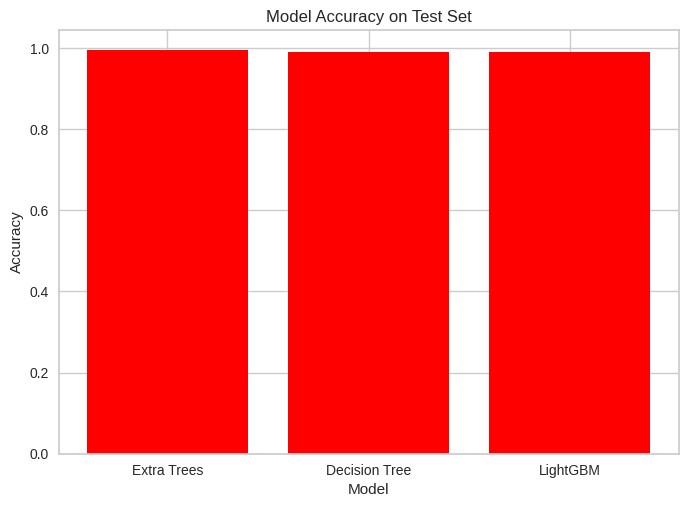

In [73]:
from pycaret.classification import *
from sklearn.model_selection import train_test_split

def get_model_name(model):
    return str(model).split("(")[0] 



# Initialize the setup
clf = setup(data=X_train, target=y_train, session_id=42)

best_model = compare_models()

# Train and tune the Extra Trees Classifier
et_model = create_model('et')
tuned_et_model = tune_model(et_model)

# Train and tune the Decision Tree Classifier
dt_model = create_model('dt')
tuned_dt_model = tune_model(dt_model)



# Train and tune the Light Gradient Boosting Machine
lgbm_model = create_model('lightgbm')
tuned_lgbm_model = tune_model(lgbm_model)



# Generate predictions on the test set for each model
et_predictions = predict_model(tuned_et_model, data=X_test)
dt_predictions = predict_model(tuned_dt_model, data=X_test)
lgbm_predictions = predict_model(tuned_lgbm_model, data=X_test)


# Calculate the accuracy of each model on the test set
et_accuracy = accuracy_score(y_test, et_predictions['prediction_label'])
dt_accuracy = accuracy_score(y_test, dt_predictions['prediction_label'])
lgbm_accuracy = accuracy_score(y_test, lgbm_predictions['prediction_label'])


# Print the accuracy of each model on the test set
print("Accuracy of each model on the test set:")
print(f"Extra Trees Classifier: {et_accuracy:.3f}")
print(f"Decision Tree Classifier: {dt_accuracy:.3f}")
print(f"Light Gradient Boosting Machine: {lgbm_accuracy:.3f}")


import matplotlib.pyplot as plt

# Create a list of model names and accuracy scores
model_names = ['Extra Trees', 'Decision Tree', 'LightGBM']
accuracy_scores = [et_accuracy, dt_accuracy,lgbm_accuracy]

# Create a bar plot of the accuracy scores
plt.bar(model_names, accuracy_scores)

# Set the plot title and axis labels
plt.title('Model Accuracy on Test Set')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# Display the plot
plt.show()


AUC-ROC score of each model on the test set:
Extra Trees Classifier: 0.665
Decision Tree Classifier: 0.500
Light Gradient Boosting Machine: 0.339


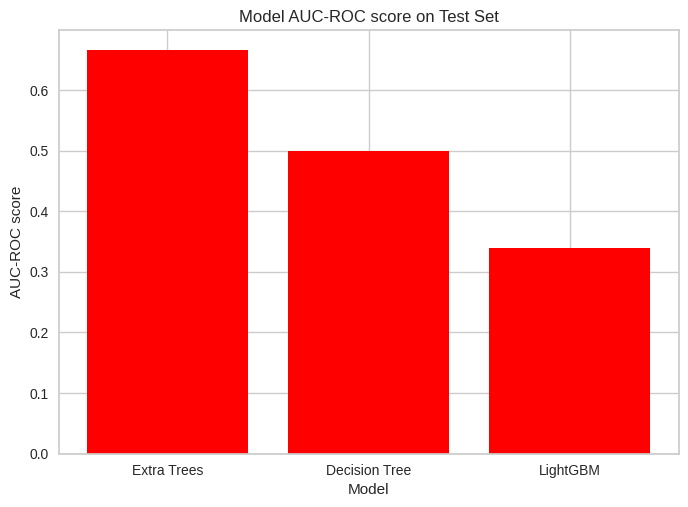

In [74]:
from sklearn.metrics import roc_curve

# Generate predictions on the test set for each model
et_predictions = predict_model(tuned_et_model, data=X_test)
dt_predictions = predict_model(tuned_dt_model, data=X_test)
lgbm_predictions = predict_model(tuned_lgbm_model, data=X_test)

# Compute the ROC curve and AUC score for each model
et_fpr, et_tpr, _ = roc_curve(y_test, et_predictions['prediction_score'])
et_roc_auc = np.trapz(et_tpr, et_fpr)

dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_predictions['prediction_score'])
dt_roc_auc = np.trapz(dt_tpr, dt_fpr)

lgbm_fpr, lgbm_tpr, _ = roc_curve(y_test, lgbm_predictions['prediction_score'])
lgbm_roc_auc = np.trapz(lgbm_tpr, lgbm_fpr)

# Print the AUC-ROC score of each model on the test set
print("AUC-ROC score of each model on the test set:")
print(f"Extra Trees Classifier: {et_roc_auc:.3f}")
print(f"Decision Tree Classifier: {dt_roc_auc:.3f}")
print(f"Light Gradient Boosting Machine: {lgbm_roc_auc:.3f}")

import matplotlib.pyplot as plt

# Create a list of model names and AUC-ROC scores
model_names = ['Extra Trees', 'Decision Tree', 'LightGBM']
auc_scores = [et_roc_auc, dt_roc_auc, lgbm_roc_auc]

# Create a bar plot of the AUC-ROC scores
plt.bar(model_names, auc_scores)

# Set the plot title and axis labels
plt.title('Model AUC-ROC score on Test Set')
plt.xlabel('Model')
plt.ylabel('AUC-ROC score')

# Display the plot
plt.show()


In [75]:
from pycaret.classification import *
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix, plot_residuals, plot_predicted_errors
from sklearn.model_selection import train_test_split

def get_model_name(model):
    return str(model).split("(")[0] 

# Initialize the setup
clf = setup(data=X_train, target=y_train, session_id=42)

best_model = compare_models()

# Train and tune the Extra Trees Classifier
et_model = create_model('et')
tuned_et_model = tune_model(et_model)

# Train and tune the Decision Tree Classifier
dt_model = create_model('dt')
tuned_dt_model = tune_model(dt_model)

# Train and tune the Random Forest Classifier
rf_model = create_model('rf')
tuned_rf_model = tune_model(rf_model)

# Train and tune the Light Gradient Boosting Machine
lgbm_model = create_model('lightgbm')
tuned_lgbm_model = tune_model(lgbm_model)

# Train and tune the Gradient Boosting Classifier
gbc_model = create_model('gbc')
tuned_gbc_model = tune_model(gbc_model)

# Generate predictions on the test set for each model
et_predictions = predict_model(tuned_et_model, data=X_test)
dt_predictions = predict_model(tuned_dt_model, data=X_test)
rf_predictions = predict_model(tuned_rf_model, data=X_test)
lgbm_predictions = predict_model(tuned_lgbm_model, data=X_test)
gbc_predictions = predict_model(tuned_gbc_model, data=X_test)

# Evaluate the models
print("Model Performance:")
models = [tuned_et_model, tuned_dt_model, tuned_rf_model, tuned_lgbm_model, tuned_gbc_model]
for i, model in enumerate(models):
    name = get_model_name(model)
    predictions = [et_predictions, dt_predictions, rf_predictions, lgbm_predictions, gbc_predictions][i]
    acc = accuracy_score(y_test, predictions['prediction_label'])
    prec = precision_score(y_test, predictions['prediction_label'])
    recall = recall_score(y_test, predictions['prediction_label'])
    f1 = f1_score(y_test, predictions['prediction_label'])
    auc = roc_auc_score(y_test, predictions['prediction_score'])
    print(f"{name} -- Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}, AUC-ROC score: {auc:.3f}")
    
    # Plot evaluation metrics
    plot_roc_curve(model, X_test, y_test)
    plot_precision_recall_curve(model, X_test, y_test)
    plot_confusion_matrix(model, X_test, y_test)
    plot_residuals(model, X_test, y_test)
    plot_predicted_errors(model, X_test, y_test)

# Identify the best model based on AUC-ROC score
best_model = models[np.argmax([roc_auc_score(y_test, [et_predictions['prediction_score'], dt_predictions['prediction_score'], rf_predictions['prediction_score'], lgbm_predictions['prediction_score'], gbc_predictions['prediction_score']][i]) for i in range(5)])]
best_model_name = get_model_name(best_model)
print(f"\nBest model: {best_model_name}")


ImportError: ignored

,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(1696, 7)"
4,Transformed data shape,"(1696, 7)"
5,Transformed train set shape,"(1187, 7)"
6,Transformed test set shape,"(509, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9933,0.9997,0.9959,0.9881,0.9919,0.9861,0.9862,0.4740
dt,Decision Tree Classifier,0.9924,0.9936,1.0000,0.9823,0.9910,0.9845,0.9847,0.4900
lightgbm,Light Gradient Boosting Machine,0.9916,0.9992,1.0000,0.9805,0.9900,0.9827,0.9831,0.2630
rf,Random Forest Classifier,0.9907,0.9994,0.9980,0.9803,0.9890,0.9810,0.9813,1.1340
xgboost,Extreme Gradient Boosting,0.9907,0.9991,0.9980,0.9805,0.9890,0.9810,0.9813,0.2440
gbc,Gradient Boosting Classifier,0.9899,0.9983,1.0000,0.9766,0.9880,0.9793,0.9797,0.3540
ada,Ada Boost Classifier,0.9882,0.9972,1.0000,0.9729,0.9861,0.9759,0.9764,0.4870
lr,Logistic Regression,0.9705,0.9948,0.9592,0.9693,0.9640,0.9390,0.9393,0.4830
knn,K Neighbors Classifier,0.9478,0.9849,0.9735,0.9092,0.9394,0.8937,0.8967,0.2550
svm,SVM - Linear Kernel,0.9435,0.0000,0.9082,0.9566,0.9277,0.8818,0.8873,0.5350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9916,0.9997,1.0000,0.9800,0.9899,0.9827,0.9829
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9748,0.9971,0.9796,0.9600,0.9697,0.9481,0.9483
7,0.9915,1.0000,0.9796,1.0000,0.9897,0.9825,0.9826
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9580,0.9758,0.9796,0.9231,0.9505,0.9141,0.9153
1,0.8824,0.9574,0.7551,0.9487,0.8409,0.7495,0.7618
2,0.8739,0.9376,0.7959,0.8864,0.8387,0.7358,0.7386
3,0.9244,0.9566,0.8980,0.9167,0.9072,0.8434,0.8435
4,0.8235,0.9402,0.6939,0.8500,0.7640,0.6254,0.6336
5,0.9076,0.9653,0.8980,0.8800,0.8889,0.8098,0.8099
6,0.8824,0.9348,0.7959,0.9070,0.8478,0.7526,0.7569
7,0.9322,0.9790,0.8367,1.0000,0.9111,0.8570,0.8659
8,0.9068,0.9731,0.8163,0.9524,0.8791,0.8040,0.8103


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9786,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
5,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9916,0.9929,1.0000,0.9800,0.9899,0.9827,0.9829
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9845,0.9796,0.9600,0.9697,0.9481,0.9483
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9748,0.9869,0.9796,0.9600,0.9697,0.9481,0.9483
5,0.9832,0.9915,0.9796,0.9796,0.9796,0.9653,0.9653
6,0.9916,0.9923,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,0.9997,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9990,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9832,0.9997,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9832,0.9959,0.9796,0.9796,0.9796,0.9653,0.9653
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9664,0.9988,0.9796,0.9412,0.9600,0.9310,0.9316
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.9664,1.0000,1.0000,0.9245,0.9608,0.9315,0.9336
4,0.9832,0.9953,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9985,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9948,1.0000,0.9800,0.9899,0.9827,0.9829
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9971,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9916,1.0000,1.0000,0.9800,0.9899,0.9827,0.9829
5,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9948,1.0000,0.9800,0.9899,0.9827,0.9829
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9980,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9832,0.9942,0.9796,0.9796,0.9796,0.9653,0.9653
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9985,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9832,0.9985,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9832,0.9994,1.0000,0.9608,0.9800,0.9655,0.9661
6,0.9916,0.9889,1.0000,0.9800,0.9899,0.9827,0.9829
7,0.9915,1.0000,1.0000,0.9800,0.9899,0.9826,0.9827
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9748,0.9988,1.0000,0.9423,0.9703,0.9484,0.9497
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9832,1.0000,1.0000,0.9608,0.9800,0.9655,0.9661
5,0.9916,0.9997,1.0000,0.9800,0.9899,0.9827,0.9829
6,0.9832,0.9948,0.9796,0.9796,0.9796,0.9653,0.9653
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Model Performance:
ExtraTreesClassifier -- Accuracy: 0.995, Precision: 0.997, Recall: 0.990, F1-score: 0.993, AUC-ROC score: 0.665
DecisionTreeClassifier -- Accuracy: 0.990, Precision: 0.983, Recall: 0.993, F1-score: 0.988, AUC-ROC score: 0.500
RandomForestClassifier -- Accuracy: 0.992, Precision: 0.980, Recall: 1.000, F1-score: 0.990, AUC-ROC score: 0.515
LGBMClassifier -- Accuracy: 0.992, Precision: 0.987, Recall: 0.993, F1-score: 0.990, AUC-ROC score: 0.339
GradientBoostingClassifier -- Accuracy: 0.995, Precision: 0.987, Recall: 1.000, F1-score: 0.993, AUC-ROC score: 0.158


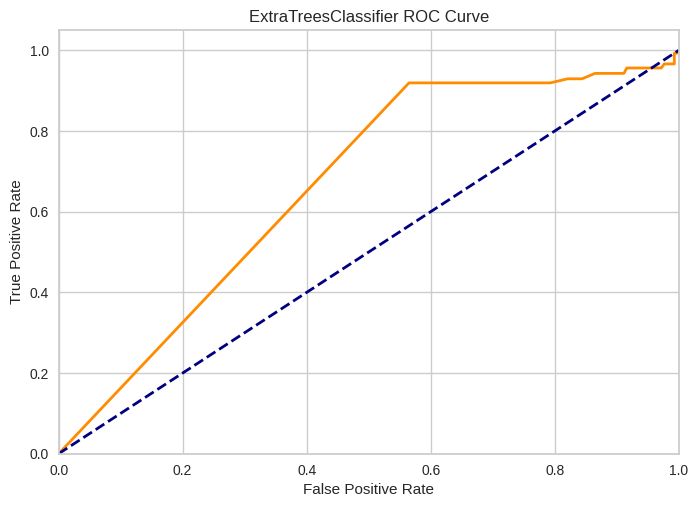

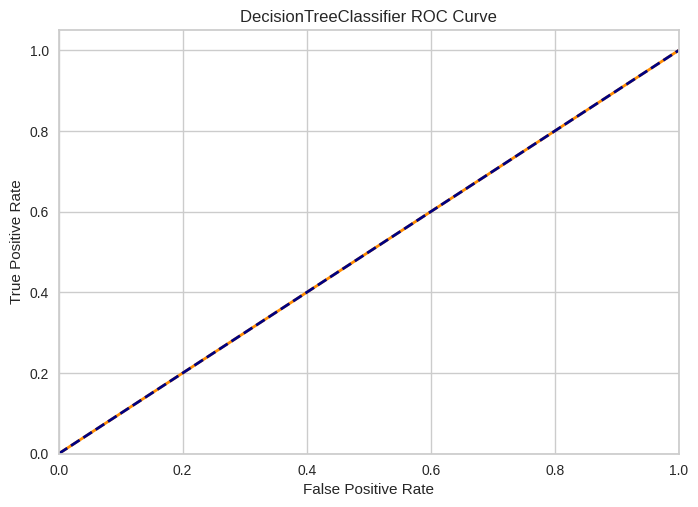

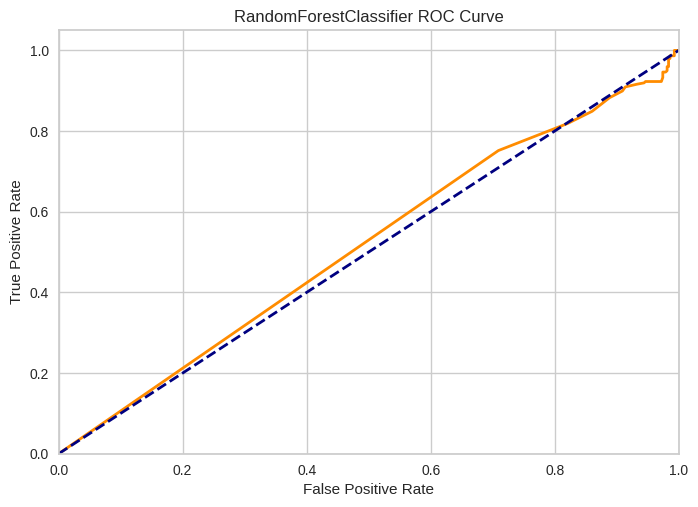

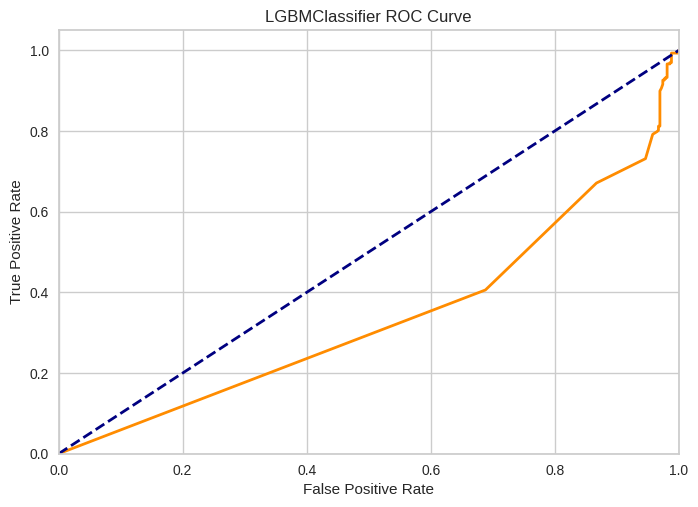

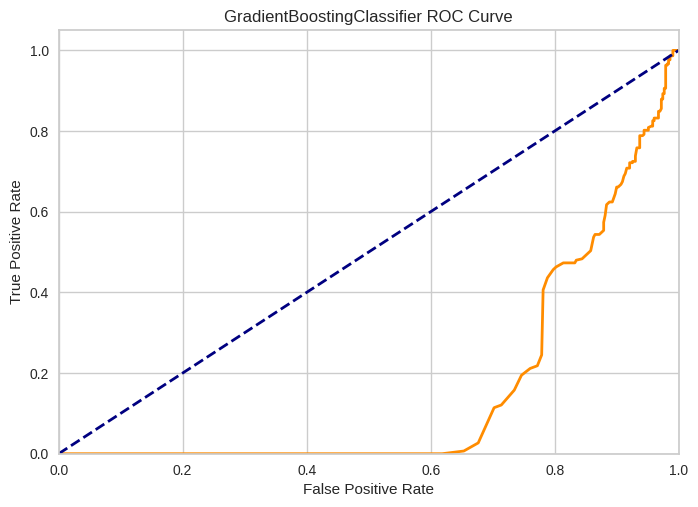

In [76]:
from pycaret.classification import *
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define a function to get the name of a model as a string
def get_model_name(model):
    return str(model).split("(")[0] 

# Initialize PyCaret setup with the training data and target variable
clf = setup(data=X_train, target=y_train, session_id=42)

# Compare the performance of different classification models and select the best one
best_model = compare_models()

# Train and tune each model using PyCaret's create_model() and tune_model() functions
et_model = create_model('et')
tuned_et_model = tune_model(et_model)

dt_model = create_model('dt')
tuned_dt_model = tune_model(dt_model)

rf_model = create_model('rf')
tuned_rf_model = tune_model(rf_model)

lgbm_model = create_model('lightgbm')
tuned_lgbm_model = tune_model(lgbm_model)

gbc_model = create_model('gbc')
tuned_gbc_model = tune_model(gbc_model)

# Generate predictions on the test set for each model
et_predictions = predict_model(tuned_et_model, data=X_test)
dt_predictions = predict_model(tuned_dt_model, data=X_test)
rf_predictions = predict_model(tuned_rf_model, data=X_test)
lgbm_predictions = predict_model(tuned_lgbm_model, data=X_test)
gbc_predictions = predict_model(tuned_gbc_model, data=X_test)

# Evaluate the performance of each model using different evaluation metrics
print("Model Performance:")
models = [tuned_et_model, tuned_dt_model, tuned_rf_model, tuned_lgbm_model, tuned_gbc_model]
for i, model in enumerate(models):
    name = get_model_name(model)
    predictions = [et_predictions, dt_predictions, rf_predictions, lgbm_predictions, gbc_predictions][i]
    acc = accuracy_score(y_test, predictions['prediction_label'])
    prec = precision_score(y_test, predictions['prediction_label'])
    recall = recall_score(y_test, predictions['prediction_label'])
    f1 = f1_score(y_test, predictions['prediction_label'])
    auc_score = roc_auc_score(y_test, predictions['prediction_score'])
    print(f"{name} -- Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}, AUC-ROC score: {auc_score:.3f}")
    
    # Manually calculate the ROC curve and plot it using Matplotlib
    fpr, tpr, thresholds = roc_curve(y_test, predictions['prediction_score'])
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')


Model Performance:
ExtraTreesClassifier -- Accuracy: 0.995, Precision: 0.997, Recall: 0.990, F1-score: 0.993, AUC-ROC score: 0.665


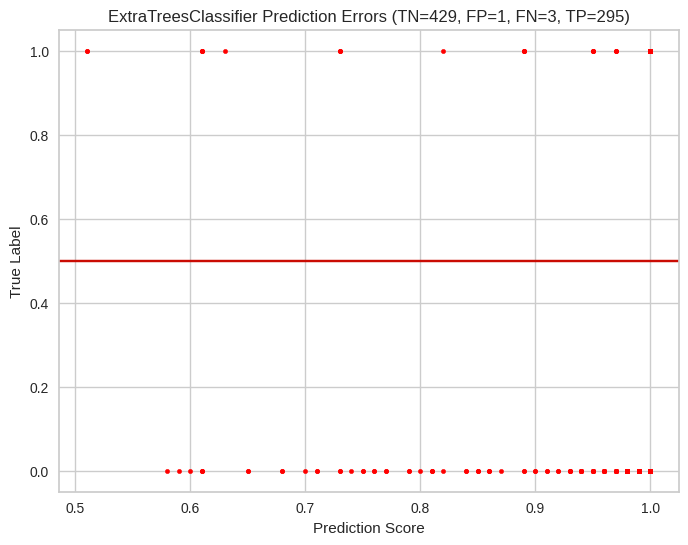

DecisionTreeClassifier -- Accuracy: 0.990, Precision: 0.983, Recall: 0.993, F1-score: 0.988, AUC-ROC score: 0.500


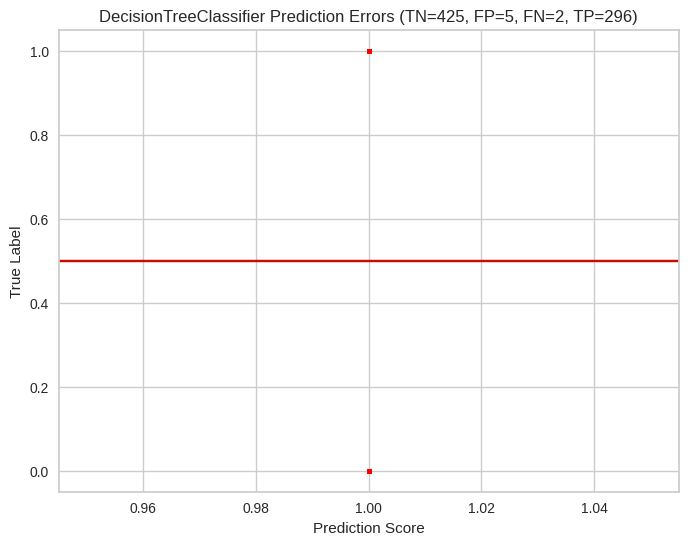

RandomForestClassifier -- Accuracy: 0.992, Precision: 0.980, Recall: 1.000, F1-score: 0.990, AUC-ROC score: 0.515


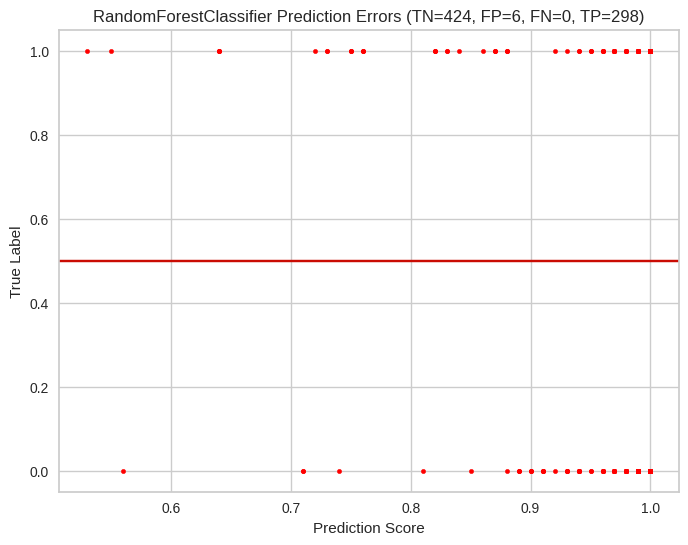

LGBMClassifier -- Accuracy: 0.992, Precision: 0.987, Recall: 0.993, F1-score: 0.990, AUC-ROC score: 0.339


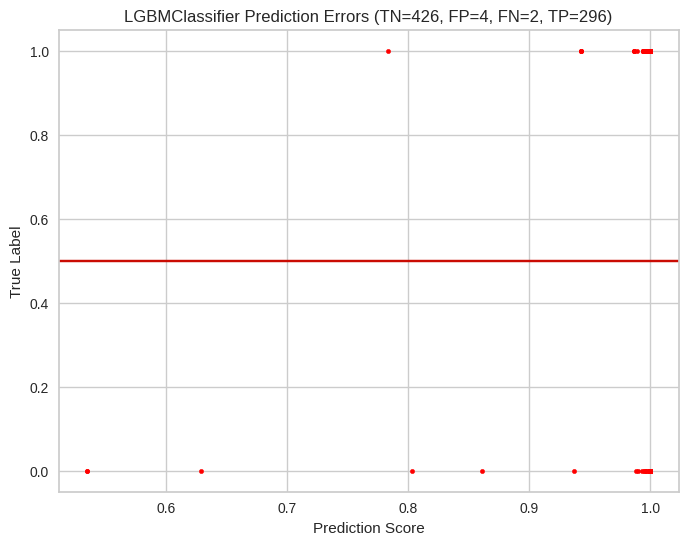

GradientBoostingClassifier -- Accuracy: 0.995, Precision: 0.987, Recall: 1.000, F1-score: 0.993, AUC-ROC score: 0.158


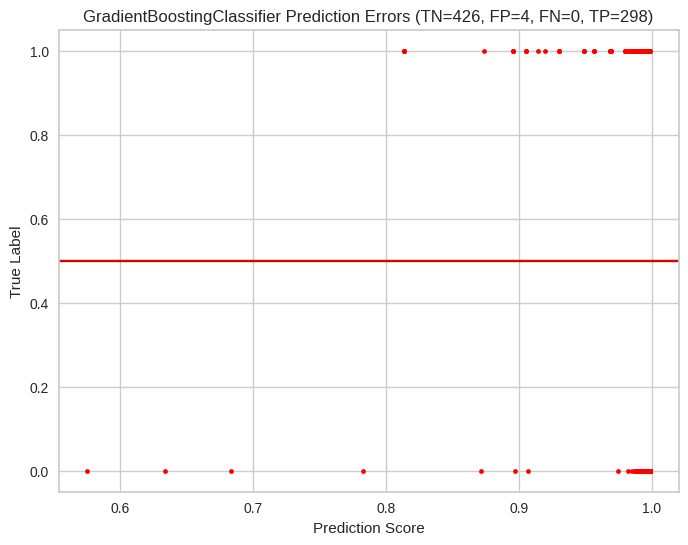

In [77]:
# Generate confusion matrix and plot prediction errors
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt





from pycaret.classification import *
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

def get_model_name(model):
    return str(model).split("(")[0] 



# Evaluate the models and generate prediction error plots
print("Model Performance:")
models = [tuned_et_model, tuned_dt_model, tuned_rf_model, tuned_lgbm_model, tuned_gbc_model]
for i, model in enumerate(models):
    name = get_model_name(model)
    predictions = [et_predictions, dt_predictions, rf_predictions, lgbm_predictions, gbc_predictions][i]
    acc = accuracy_score(y_test, predictions['prediction_label'])
    prec = precision_score(y_test, predictions['prediction_label'])
    recall = recall_score(y_test, predictions['prediction_label'])
    f1 = f1_score(y_test, predictions['prediction_label'])
    auc_score = roc_auc_score(y_test, predictions['prediction_score'])
    print(f"{name} -- Accuracy: {acc:.3f}, Precision: {prec:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}, AUC-ROC score: {auc_score:.3f}")
    
    # Generate confusion matrix and plot prediction errors
    cm = confusion_matrix(y_test, predictions['prediction_label'])
    tn, fp, fn, tp = cm.ravel()
    plt.figure(figsize=(8,6))
    plt.scatter(predictions['prediction_score'], predictions['prediction_label'], s=10)
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.xlabel('Prediction Score')
    plt.ylabel('True Label')
    plt.title(f"{name} Prediction Errors (TN={tn}, FP={fp}, FN={fn}, TP={tp})")
    plt.show()


